In [1]:
import os 
from src.data.text import load_json
base_path = 'experiments/clean-motionfix' 
base_dir=f'{base_path}/bodilex_hml3d_sinc_synth/30-35-35_bs128_300ts_clip77_with_zeros_source/steps_1000_bodilex_noise_last'
loxps=[ f.path for f in os.scandir(base_dir) if f.is_dir()]


/home/nathanasiou/.venvs/TMR/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
loxps


['experiments/clean-motionfix/bodilex_hml3d_sinc_synth/30-35-35_bs128_300ts_clip77_with_zeros_source/steps_1000_sinc_synth_noise_last',
 'experiments/clean-motionfix/bodilex_hml3d_sinc_synth/30-35-35_bs128_300ts_clip77_with_zeros_source/steps_1000_bodilex_noise_last',
 'experiments/clean-motionfix/bodilex_hml3d_sinc_synth/30-35-35_bs128_300ts_clip77_with_zeros_source/wandb',
 'experiments/clean-motionfix/bodilex_hml3d_sinc_synth/30-35-35_bs128_300ts_clip77_with_zeros_source/checkpoints',
 'experiments/clean-motionfix/bodilex_hml3d_sinc_synth/30-35-35_bs128_300ts_clip77_with_zeros_source/.hydra']

In [2]:
expname = '__'.join(base_dir.split('/')[-3:-1])
print('=========={expname}=========')
import re
from tqdm import tqdm
guidance_tnm = []
guidance_m = []
s2t_avgr_batch = []
t2t_avgr_batch = []
s2t_avgr_all = []
t2t_avgr_all = []
from numpy import number

for x in tqsm(loxps):
    gd_comb = x.split('/')[-1]
    numbers = re.findall(r'\d+\.\d+', gd_comb)
    print(numbers)
    guidance_tnm.append(float(numbers[0]))
    guidance_m.append(float(numbers[1]))

    data_batch=load_json(x+'/batches_res.json')
    data_all=load_json(x+'/all_res.json')
    s2t_avgr_batch.append(float(data_batch['AvgR_s2t']))
    t2t_avgr_batch.append(float(data_batch['AvgR']))
    s2t_avgr_all.append(float(data_all['AvgR_s2t']))
    t2t_avgr_all.append(float(data_all['AvgR']))

    print('---')

=========={expname}=========
['2.5', '2.0']
---
['1.0', '2.0']
---
['2.0', '3.0']
---
['3.0', '1.5']
---
['1.0', '2.5']
---
['1.0', '1.5']
---
['3.0', '3.0']
---
['2.0', '2.5']
---
['3.0', '1.0']
---
['1.5', '1.5']
---
['3.0', '2.0']
---
['1.5', '2.5']
---
['2.0', '2.0']
---
['1.5', '1.0']
---
['1.0', '3.0']
---
['1.5', '2.0']
---
['3.0', '2.5']
---
['2.0', '1.5']
---
['2.5', '3.0']
---
['2.0', '1.0']
---
['1.0', '1.0']
---
['2.5', '2.5']
---
['2.5', '1.0']
---
['1.5', '3.0']
---
['2.5', '1.5']
---


In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
def plot_values3d(x, y, z, xname, yname, zname):
    fig = plt.figure(layout="constrained")
    ax = fig.add_subplot(111, projection='3d')
    # fig, ax = plt.subplots(layout="constrained")
    # ax.plot(x, y, z)
    ax.plot(x, y, z, 'o')

    for i in range(len(x)):
        ax.text(x[i], y[i], z[i], f'({x[i]}, {y[i]})')


    ax.set_xlabel(xname)
    ax.set_ylabel(yname)
    ax.set_zlabel(zname)
    plt.tight_layout()  # Adjust layout to prevent cropping

    ax.view_init(elev=20, azim=45)

    plt.show()


In [34]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import Normalize
import seaborn as sns
sns.set(style="darkgrid")

def plot_2d_3d_plot(x, y, z, xname, yname, invert_size=True):
    fig, ax = plt.subplots(figsize=(10, 8), dpi=120)
    norm = Normalize(vmin=min(z), vmax=max(z))
    z_normalized = norm(z)  # Apply normalization
    
    # z_normalized = [(zi - min(z)) / (max(z) - min(z)) for zi in z]  # Normalize z values to range 0-1
    # z_area = [z_size * 1000 for z_size in z_normalized]  # Scale up for visibility
    # z_area = [(z_size + 0.1) ** 2 * 1000 for z_size in z_normalized]  # Exponential transformation
    if invert_size:
        # Invert the size scaling: bigger numbers get smaller circles
        z_area = [(1 - z_size + 0.1) ** 2 * 1000 for z_size in z_normalized]
    else:
        # Normal size scaling: bigger numbers get bigger circles
        z_area = [(z_size + 0.1) ** 2 * 1000 for z_size in z_normalized]
    
    colors = plt.cm.cividis(z_normalized)
    # Plot each point with an area proportional to z value
    scatter = ax.scatter(x, y, s=z_area, c=colors, alpha=0.8,
                         norm=norm, marker='o',
                         edgecolor='k', linewidth=0.5)  # Use 'o' as the marker for circles
    # Annotate each circle with its z value
    for i, txt in enumerate(z):
        ax.annotate(txt, (x[i], y[i]), textcoords="offset points", xytext=(0,15), ha='center')
    ax.set_xlabel(xname)
    ax.set_ylabel(yname)
    ax.set_title('Plot of guidances and AvgR')

    # cbar = plt.colorbar(scatter, ax=ax)
    cbar = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap='cividis'), ax=ax)
    
    cbar.set_label('AvgR')
    # Set the ticks of the colorbar to match the original z values
    # tick_positions = np.linspace(0, 1, 5)
    # tick_labels = np.linspace(min(z), max(z), 5)
    # cbar.set_ticks(tick_positions)  # Position of ticks
    # cbar.set_ticklabels(np.round(tick_labels, 2))  # Text of ticks
    tick_positions = np.linspace(min(z), max(z), 5)
    cbar.set_ticks(tick_positions)  # Position of ticks
    cbar.set_ticklabels(np.round(tick_positions, 2))  # Text of ticks
    cbar.ax.tick_params(labelsize=10)
    # Set the ticks of the colorbar to show five evenly spaced values
    
    # Adjust the plot's axes limits to add more space
    x_margin = 0.2  # Additional x margin
    y_margin = 0.2    # Additional y margin
    ax.set_xlim(min(x) - x_margin, max(x) + x_margin)
    ax.set_ylim(min(y) - y_margin, max(y) + y_margin)

    # Show the plot
    # plt.grid(True)  # Optional, adds a grid to the plot
    plt.show()


/tmp/ipykernel_144752/3833217618.py:24: UserWarning: No data for colormapping provided via 'c'. Parameters 'norm' will be ignored
  scatter = ax.scatter(x, y, s=z_area, c=colors, alpha=0.8,


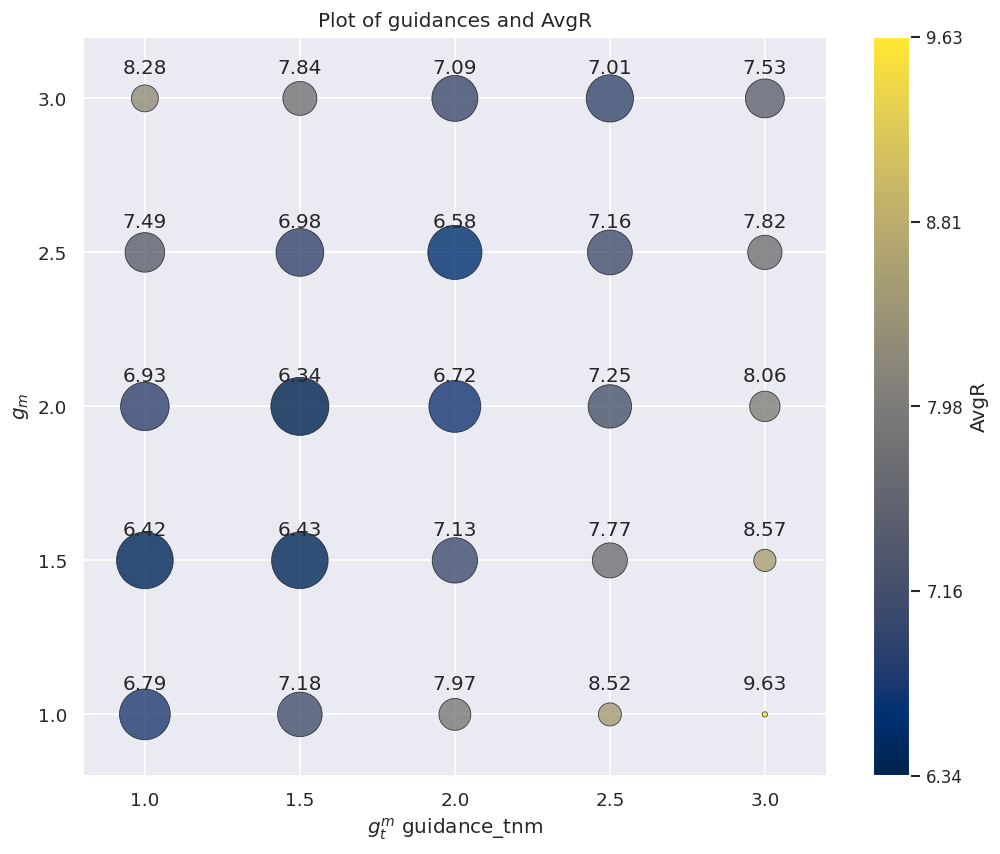

In [35]:
plot_2d_3d_plot(guidance_tnm, guidance_m, s2t_avgr_batch,
                '$g_{t}^{m}$ guidance_tnm', '$g_m$')
#              'guidance_tnm', 'guidance_m', 's2t_avgr_batch')

/tmp/ipykernel_138024/2066055315.py:17: UserWarning: The figure layout has changed to tight
  plt.tight_layout()  # Adjust layout to prevent cropping


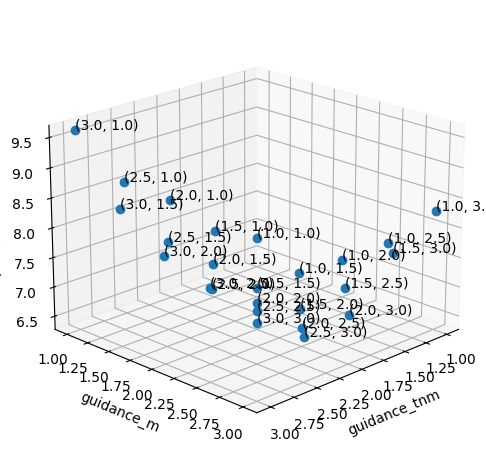

In [6]:
plot_values3d(guidance_tnm, guidance_m, s2t_avgr_batch, 
              'guidance_tnm', 'guidance_m', 's2t_avgr_batch')
plot_values3d(guidance_tnm, guidance_m, s2t_avgr_batch, 
              'guidance_tnm', 'guidance_m', 's2t_avgr_batch')

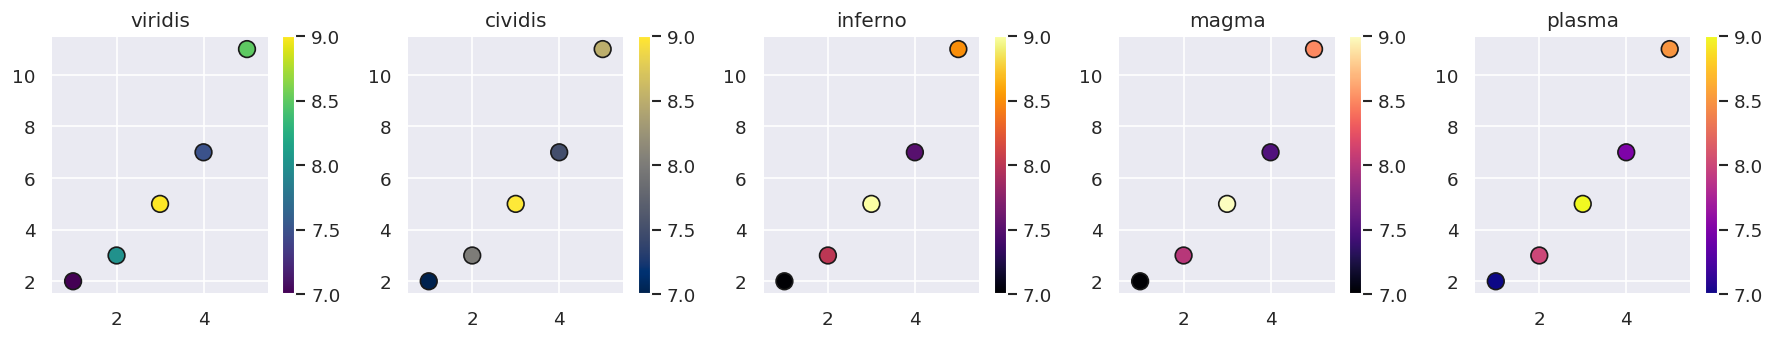

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Data setup
x = [1, 2, 3, 4, 5]
y = [2, 3, 5, 7, 11]
z = [7, 8, 9, 7.5, 8.5]

# Normalize the z values
norm = plt.Normalize(min(z), max(z))

# List of colormaps to display
colormaps = ['viridis', 'cividis', 'inferno', 'magma', 'plasma']

fig, axs = plt.subplots(1, 5, figsize=(15, 3), dpi=120)
for ax, cmap in zip(axs, colormaps):
    scatter = ax.scatter(x, y, c=z, cmap=cmap, s=100, norm=norm, edgecolor='k')
    ax.set_title(cmap)
    plt.colorbar(scatter, ax=ax, orientation='vertical')
    ax.set_xlim(0.5, 5.5)
    ax.set_ylim(1.5, 11.5)

plt.tight_layout()
plt.show()
